In [35]:
import pandas as pd
df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/IRIS/dummy.csv", encoding = "ISO-8859-1", error_bad_lines=False)
df

,Sepal length,Sepal Width,Petal length,Petal Width,Class1,Class2
0,5.1,3.5,1.4,0.2,setosa,dummy1
1,4.9,3.0,1.4,0.2,versicolor,dummy2
2,4.7,3.2,1.3,0.2,virginica,dummy2
3,4.6,3.1,1.5,0.2,virginica,dummy1
4,5.0,3.6,1.4,0.2,setosa,dummy1


In [36]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'Class1'
IDcol = 'ID'

In [37]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import linear_model

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome, performCV=True, printFeatureImportance=True):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
    
  #cv_score = cross_validation.cross_val_score(model, data[predictors], mlb, cv=5, scoring='roc_auc')  
  #print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
  #Print Feature Importance:
  if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [38]:
#define a function which will help us create GBM models and perform cross-validation.

def modelfit(alg, dtrain, predictors, y, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
  
    #dtrain['Class'] = label_binarize(dtrain['Class'], classes=[0, 1, 2])
    X = dtrain[predictors].values
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        scoring = 'accuracy'
        cv_score = cross_validation.cross_val_score(model, X, y, cv=cv_folds, scoring=scoring)
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

Accuracy : 100.000%
Cross-Validation Score : 60.000%


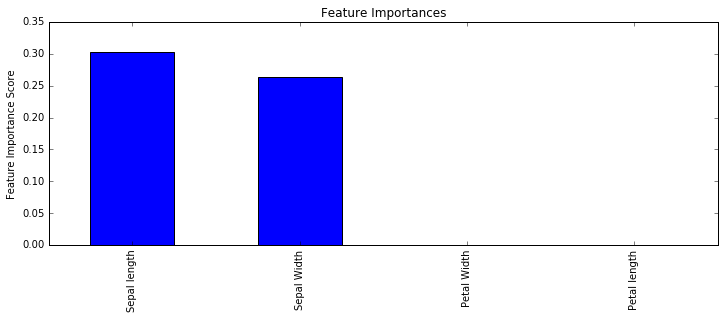

In [39]:
#Create baseline model with GBM
predictors = [x for x in df.columns if x not in [response, IDcol, 'Class2']]
response = 'Class1'
gbm0 = GradientBoostingClassifier(random_state=10)
classification_model(gbm0, df, predictors, response)

In [40]:
df1=df[['Class1', 'Class2']]
df1

,Class1,Class2
0,setosa,dummy1
1,versicolor,dummy2
2,virginica,dummy2
3,virginica,dummy1
4,setosa,dummy1


In [41]:
df1.values

array([['setosa', 'dummy1'],
       ['versicolor', 'dummy2'],
       ['virginica', 'dummy2'],
       ['virginica', 'dummy1'],
       ['setosa', 'dummy1']], dtype=object)

In [42]:
np.array(df1.values)

array([['setosa', 'dummy1'],
       ['versicolor', 'dummy2'],
       ['virginica', 'dummy2'],
       ['virginica', 'dummy1'],
       ['setosa', 'dummy1']], dtype=object)

In [45]:
#Create baseline model with GBM
predictors = [x for x in df.columns if x not in ['Class1', 'Class2', IDcol]]
response = df[['Class1', 'Class2']].values
lb = preprocessing.MultiLabelBinarizer()
y = lb.fit_transform(response)
print (y)
model = OneVsRestClassifier(GradientBoostingClassifier(random_state=10))
modelfit(model, df, predictors, y)

[[1 0 1 0 0]
 [0 1 0 1 0]
 [0 1 0 0 1]
 [1 0 0 0 1]
 [1 0 1 0 0]]


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))



Model Report
Accuracy : 1
CV Score : Mean - 0.2 | Std - 0.4 | Min - 0 | Max - 1


In [46]:
#Test the model

In [49]:
df_test = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/IRIS/dummy_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [50]:
prediction = model.predict(df_test[0:])

In [51]:
print (prediction)

[[1 0 1 0 0]
 [0 1 0 1 0]
 [0 1 0 0 1]
 [1 0 0 0 1]
 [1 0 1 0 0]]


In [52]:
prediction.shape

(5, 5)

In [53]:
predicted = lb.inverse_transform(prediction)

In [55]:
df_o = pd.DataFrame(predicted, columns = ['Class1', 'Class2'])
df_o

,Class1,Class2
0,dummy1,setosa
1,dummy2,versicolor
2,dummy2,virginica
3,dummy1,virginica
4,dummy1,setosa
